<a href="https://colab.research.google.com/github/rgolds5/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Richard%20Goldsmith_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [8]:
# TODO

import pandas as pd

# Defining a list with feature names.
col_names = ['Pat_Op_Age', 'Op_Year', 'Pos_Aux_Nodes', 'Five_Yr_Surv']

# Reading in file indicating it does not have a header and replacing column indexing with the list of feature names.
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header = None, names = col_names)

# Re-code the values in Five__Yr_Surv to traditional binary encoding
df['Five_Yr_Surv'] = df['Five_Yr_Surv'].replace(2, 0)

#Verifiying the size of the dataframe. According to data documentation, it should have 306 observations and 4 features.
df.shape

(306, 4)

In [9]:
# Validating no missing values. According to the data documentation, there should be zero missing values.
df.isnull().sum()

Pat_Op_Age       0
Op_Year          0
Pos_Aux_Nodes    0
Five_Yr_Surv     0
dtype: int64

In [10]:
# Print the first 5 rows

df.head()

,Pat_Op_Age,Op_Year,Pos_Aux_Nodes,Five_Yr_Surv
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [51]:
# TODO

# Print a dataframe of summary statistics for numerical features
df.describe()

,Pat_Op_Age,Op_Year,Pos_Aux_Nodes,Five_Yr_Surv
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [29]:
# Binning 15-Year Age Groups (except for the last bin which is 20 years due to low number of obs past 80)
age_binned = pd.cut(df['Pat_Op_Age'], [20, 35, 50, 65, 85])

# Using crosstabs to determine the percentage of 5 year survival rate in each age group.
pd.crosstab(age_binned, df['Five_Yr_Surv'], normalize = 'index')

Five_Yr_Surv,0,1
Pat_Op_Age,,
"(20, 35]",0.125000,0.875000
"(35, 50]",0.258333,0.741667
"(50, 65]",0.280303,0.719697
"(65, 85]",0.289474,0.710526


In [48]:
from scipy import stats

# Since survival rate is a binary feature, determining the Point-Biserial Correlation between each feature and Five-Year Survival
# (I attempted to build a dataframe from this, but I will need to practice further as it was taking too much time.)
columns = [df['Pat_Op_Age'], df['Op_Year'], df['Pos_Aux_Nodes']]
for column in columns:
  corr_coef = stats.pointbiserialr(column, df['Five_Yr_Surv'])
  print(f'The correlation coeffecient of {column.name} and Five_Yr_Surv is {round(corr_coef[0], 3)}.')
  


The correlation coeffecient of Pat_Op_Age and Five_Yr_Surv is -0.068.
The correlation coeffecient of Op_Year and Five_Yr_Surv is 0.005.
The correlation coeffecient of Pos_Aux_Nodes and Five_Yr_Surv is -0.287.


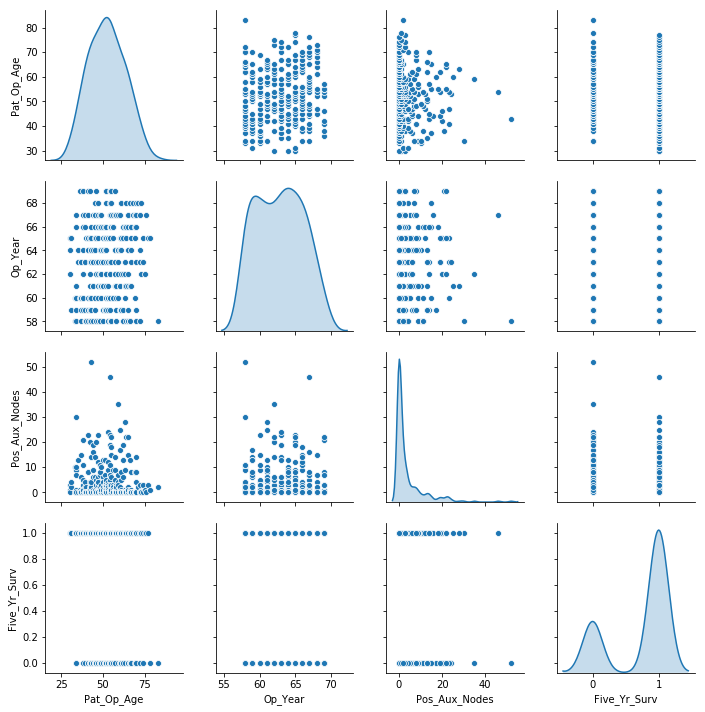

In [65]:
import seaborn as sns

# Creating a pairplot with density plots down the diaginol to see if any patterns emerge.
sns.pairplot(df, diag_kind = 'kde');



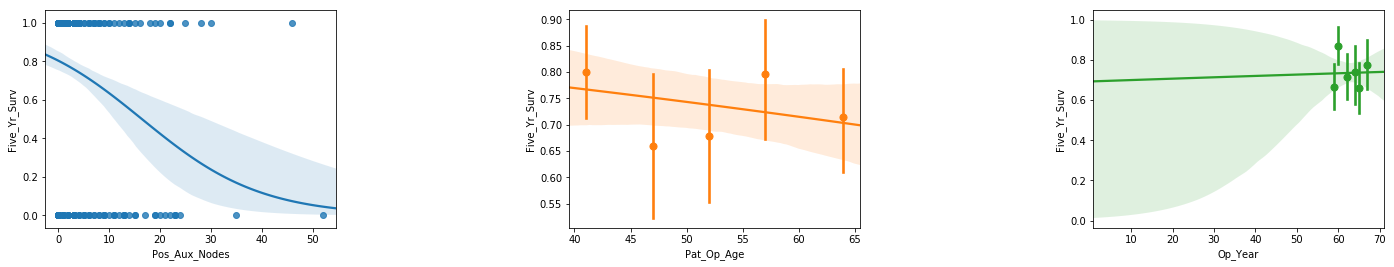

In [84]:
import matplotlib.pyplot as plt

# Creating logistic regression plots of the Postive Nodes, Patient Age, and Year of Surgery versus Survival Rate to visualize the strength of trends.
# I need to work more on styling my plots and utilizing more advanced plotting methods. I ran out of time before I could figure out how to get xlim to work on the seaborn plots.

fig, axs = plt.subplots(ncols=3, figsize = (24, 4))
fig.subplots_adjust(wspace=0.8)
sns.regplot(df['Pos_Aux_Nodes'],df['Five_Yr_Surv'], logistic = True, ax = axs[0])
sns.regplot(df['Pat_Op_Age'],df['Five_Yr_Surv'], logistic = True, ax = axs[1], x_bins = 5)
sns.regplot(df['Op_Year'],df['Five_Yr_Surv'], logistic = True, ax = axs[2],x_bins = 6, y_jitter = 0.3);


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?

The only feature I could see to have any type of positive relationship with survival was the year of the operation, and that was an extrememly weak, almost non-existent relationship.

- What is at least one feature that looks to have a negative relationship with survival?

Both the number of Positive Auxillary Nodes and the Age of the Patient at the time of the Operation had a negative relationship with Survival rate. The node count having a much stronger relationship. 

- How are those two features related with each other, and what might that mean?

Any benefit that a positive relationship between the year of the operation and the other variables would most likely be due advancements in knowledge of cancer and surgical techniques. The positive relationship between the node count and survival is inherent in that the more nodes removed likely relates to more aggressive forms of cancer.

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.